In [10]:
import pandas                    as pd
import matplotlib.pyplot         as plt
import numpy                     as np
# Defining Primordial Functions
def adder(Data, times):
    
    for i in range(1, times + 1):
    
        new = np.zeros((len(Data), 1), dtype = float)
        Data = np.append(Data, new, axis = 1)    
    return Data
def deleter(Data, index, times):
    
    for i in range(1, times + 1):
    
        Data = np.delete(Data, index, axis = 1)    
    return Data
   
def jump(Data, jump):
    
    Data = Data[jump:, ]
    
    return Data
def indicator_plot_double(Data, first_panel, second_panel, window = 250):
    fig, ax = plt.subplots(2, figsize = (10, 5))
    
    ax[0].plot(Data[-window:, first_panel], color = 'black', linewidth = 1)
    ax[0].grid() 
     
    ax[1].plot(Data[-window:, second_panel], color = 'brown', linewidth = 1)
    ax[1].grid()
    ax[1].legend()

#------ Notebook Functions /\


No handles with labels found to put in legend.


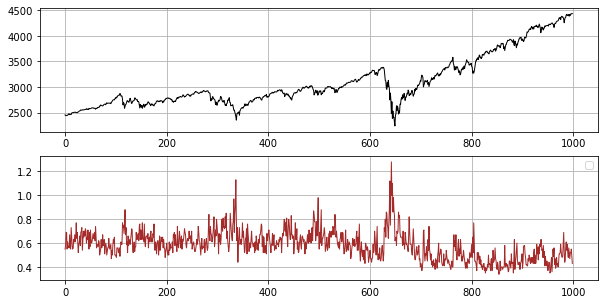

In [11]:
#------ Strategy 1. Put Call Ratio

my_data = pd.read_excel(r"C:\users\johnf\downloads\EQPCR.xlsx")
my_data = np.array(my_data)


def signal(Data, pcr, buy, sell):
    
    Data = adder(Data, 2)
    
    for i in range(len(Data)):
        
        if Data[i, pcr] >= 0.85 and Data[i - 1, buy] == 0 and Data[i - 2, buy] == 0 and Data[i - 3, buy] == 0:
            
            Data[i, buy] = 1    
            
        elif Data[i, pcr] <= 0.35 and Data[i - 1, sell] == 0 and Data[i - 2, sell] == 0 and Data[i - 3, sell] == 0:
            
            Data[i, sell] = -1
            
    return Data
my_data = signal(my_data, 1, 3, 4)


indicator_plot_double(my_data,2,1,1000 )


<ipython-input-12-cdac5c2638e6>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
<ipython-input-12-cdac5c2638e6>:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
No handles with labels found to put in legend.


array([[Timestamp('2017-08-22 00:00:00'), 0.55, 2452.51, 0.0, 0.0],
       [Timestamp('2017-08-23 00:00:00'), 0.58, 2444.04, 0.0, 0.0],
       [Timestamp('2017-08-24 00:00:00'), 0.69, 2438.97, 0.0, 0.0],
       ...,
       [Timestamp('2021-08-06 00:00:00'), 0.55, 4436.52, 0.0, 0.0],
       [Timestamp('2021-08-09 00:00:00'), 0.49, 4432.35, 0.0, 0.0],
       [Timestamp('2021-08-10 00:00:00'), 0.43, 4436.75, 0.0, 0.0]],
      dtype=object)

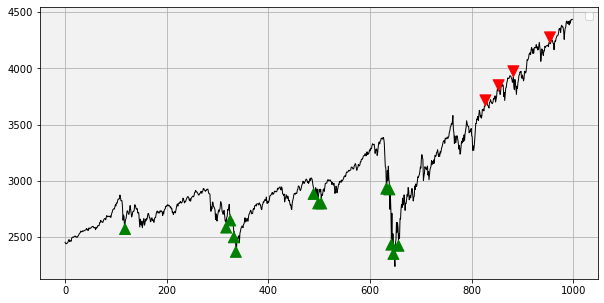

In [12]:
#-------

def signal_chart_ohlc_color(Data, values,what_bull,what_sell, window = 1000):   
     
    Plottable = Data[-window:, ]
    
    fig, ax = plt.subplots(figsize = (10, 5))
    
    plt.plot(Data[-window:, values], color = 'black', linewidth = 1)    
    
    for i in range(len(Plottable)):
        
        if Plottable[i, what_bull] == 1:
            
            x = i
            y = Plottable[i, values]
        
            ax.annotate(' ', xy = (x, y), 
                        arrowprops = dict(width = 9, headlength = 11, headwidth = 11, facecolor = 'green', color = 'green'))    
        elif Plottable[i, what_sell] == -1:
            
            x = i
            y = Plottable[i, values]
        
            ax.annotate(' ', xy = (x, y), 
                        arrowprops = dict(width = 9, headlength = -11, headwidth = -11, facecolor = 'red', color = 'red'))
    
    ax.set_facecolor((0.95, 0.95, 0.95)) 
    plt.legend() 
    plt.grid()
signal_chart_ohlc_color(my_data,2, 3,4, window = 1000)

display (my_data)




In [13]:
#------

# Choosing an example of 21 periods
period = 21
def signal_quality(Data, closing, buy, sell, period, where):
    
    Data = adder(Data, 1)
    
    for i in range(len(Data)):
        
        try:   
            
            if Data[i, buy] == 1:
                
                Data[i + period, where] = Data[i + period, closing] - Data[i, closing]
            
            if Data[i, sell] == -1:
                
                Data[i + period, where] = Data[i, closing] - Data[i + period, closing]
                
        except IndexError:
            
             pass
         
    return Data
# Using 21 Periods as a Window of signal Quality Check


my_data = signal_quality(my_data, 2, 3, 4, period, 5)
print(my_data)

positives = my_data[my_data[:, 5] > 0]
negatives = my_data[my_data[:, 5] < 0]
# Calculating Signal Quality


Signal_quality = (len(positives) / (len(negatives) + len(positives)))
print('Signal Quality = ', round(Signal_quality * 100, 2), '%')



[[Timestamp('2017-08-22 00:00:00') 0.55 2452.51 0.0 0.0 0.0]
 [Timestamp('2017-08-23 00:00:00') 0.58 2444.04 0.0 0.0 0.0]
 [Timestamp('2017-08-24 00:00:00') 0.69 2438.97 0.0 0.0 0.0]
 ...
 [Timestamp('2021-08-06 00:00:00') 0.55 4436.52 0.0 0.0 0.0]
 [Timestamp('2021-08-09 00:00:00') 0.49 4432.35 0.0 0.0 0.0]
 [Timestamp('2021-08-10 00:00:00') 0.43 4436.75 0.0 0.0 0.0]]
Signal Quality =  52.94 %


<ipython-input-12-cdac5c2638e6>:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
<ipython-input-12-cdac5c2638e6>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
No handles with labels found to put in legend.


[[ 1.01100e+01  2.47542e+03  0.00000e+00 -1.00000e+00]
 [ 1.02900e+01  2.47210e+03  0.00000e+00 -1.00000e+00]
 [ 1.02600e+01  2.47030e+03  0.00000e+00 -1.00000e+00]
 ...
 [ 1.61700e+01  4.44770e+03  0.00000e+00  0.00000e+00]
 [ 1.55900e+01  4.46084e+03  0.00000e+00  0.00000e+00]
 [ 1.54500e+01  4.46800e+03  0.00000e+00 -1.00000e+00]]
Signal Quality =  32.08 %


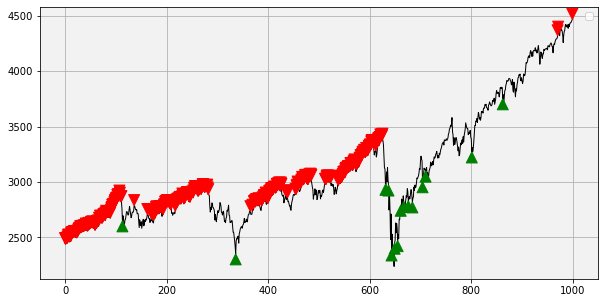

In [14]:
#----- strategy 2  VIX

my_data = pd.read_excel(r'C:\users\johnf\downloads\VIX.xlsx')
my_data = np.array(my_data)


def signal(Data, vix, buy,sell):
    
    Data = adder(Data, 2)
    
    for i in range(len(Data)):
        
        if Data[i, vix] >= 35 and Data[i - 1, buy] == 0 and Data[i - 2, buy] == 0 and Data[i - 3, buy] == 0 and Data[i - 4, buy] == 0 and Data[i - 5, buy] == 0:
            
            Data[i, buy] = 1
        if Data[i, vix] <= 15.5 and Data[i - 1, buy] == 0 and Data[i - 2, buy] == 0 and Data[i - 3, buy] == 0 and Data[i - 4, buy] == 0 and Data[i - 5, buy] == 0:
       
            Data[i, sell] = -1
    return Data


my_data = signal(my_data,0,2,3)

signal_chart_ohlc_color(my_data,1, 2,3, window = 1000)

print(my_data)
# Choosing an example of 21 periods
period = 21
# Using 21 Periods as a Window of signal Quality Check
my_data = signal_quality(my_data, 1, 2,3, period, 4)
positives = my_data[my_data[:, 4] > 0]
negatives = my_data[my_data[:, 4] < 0]
# Calculating Signal Quality
Signal_quality = len(positives) / (len(negatives) + len(positives))
print('Signal Quality = ', round(Signal_quality * 100, 2), '%')
# Output: Signal Quality = 86.67%



[[1361.219971 0.37884209915686345 0.0 -1]
 [1356.619995 0.3834110799414632 0.0 -1]
 [1347.319946 0.39212179979185374 0.0 -1]
 ...
 [4486.459961 0.4185797994502899 0.0 0.0]
 [4519.629883 0.4423716458545893 1 0.0]
 [4536.189941 0.4206912851204971 0.0 0.0]]


<ipython-input-12-cdac5c2638e6>:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
<ipython-input-12-cdac5c2638e6>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
No handles with labels found to put in legend.


Signal Quality =  51.26 %


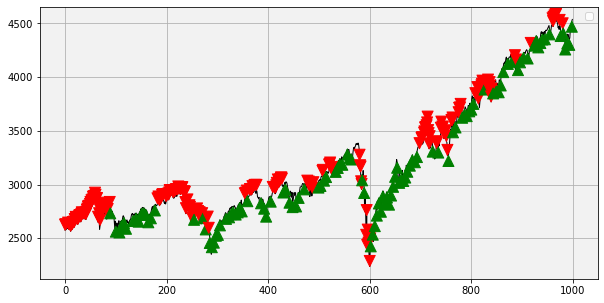

In [15]:
#----- stragegy 3 DIX

# Importing the Excel File Using pandas
my_data = pd.read_csv(r'C:\users\johnf\downloads\DIX.csv')
# Transforming the File to an Array
my_data = np.array(my_data)
# Eliminating the time stamp
my_data = my_data[:, 1:3]

period = 21

# Creating the Signal Function
def signal(Data, dix, buy,sell):
    
    Data = adder(Data, 2)
    
    for i in range(len(Data)):
        
        if Data[i, dix] >= 0.435 and Data[i - 1, buy] == 0 and Data[i - 2, buy] == 0 and Data[i - 3, buy] == 0:
            
            Data[i, buy] = 1
        if Data[i, dix] <= 0.405 and Data[i - 1, buy] == 0 and Data[i - 2, buy] == 0 and Data[i - 3, buy] == 0:
        
            Data[i, sell] = -1
            
    return Data
my_data = signal(my_data, 1, 2,3)

print(my_data)


signal_chart_ohlc_color(my_data,0, 2,3, window = 1000)

# Using 21 Periods as a Window of signal Quality Check
my_data = signal_quality(my_data, 0, 2,3, period, 4)
positives = my_data[my_data[:, 4] > 0]
negatives = my_data[my_data[:, 4] < 0]
# Calculating Signal Quality
Signal_quality = len(positives) / (len(negatives) + len(positives))
print('Signal Quality = ', round(Signal_quality * 100, 2), '%')
# Output: 71.13 %

<ipython-input-12-cdac5c2638e6>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
<ipython-input-12-cdac5c2638e6>:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(' ', xy = (x, y),
No handles with labels found to put in legend.


Signal Quality =  59.68 %


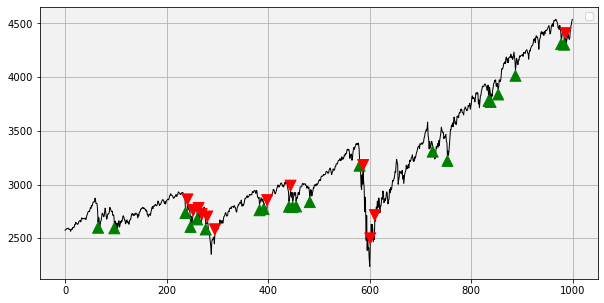

In [16]:
# Importing the Excel File Using pandas
my_data = pd.read_csv(r'C:\users\johnf\downloads\DIX.csv')
# Transforming the File to an Array
my_data = np.array(my_data)
# Eliminating the time stamp
my_data = my_data[:, 1:4]
# Deleting the Middle Column
my_data = deleter(my_data, 1, 1)
# Creating the Signal Function


def signal(Data, gex, buy, sell):
    
    Data = adder(Data, 2)
    
    for i in range(len(Data)):
        
        if Data[i, gex] <= 0 and Data[i - 1, gex] > 1 and Data[i - 2, gex] > 1 and Data[i - 3, gex] > 1:
            
            Data[i, buy] = 1
        if Data[i, gex] >= 0 and Data[i - 1, gex] < 1 and Data[i - 2, gex] < 1 and Data[i - 3, gex] < 1:
            Data[i, sell] = -1
    return Data

my_data = signal(my_data, 1, 2,3)

signal_chart_ohlc_color(my_data,0, 2,3, window = 1000)

# Using 21 Periods as a Window of signal Quality Check
my_data = signal_quality(my_data, 0, 2,3, period, 4)
positives = my_data[my_data[:, 4] > 0]
negatives = my_data[my_data[:, 4] < 0]
# Calculating Signal Quality
signal_quality = len(positives) / (len(negatives) + len(positives))
print('Signal Quality = ', round(signal_quality * 100, 2), '%')
# Output: 74.36 %

No handles with labels found to put in legend.


[[1361.219971 0.37884209915686345 1897312571.486]
 [1356.619995 0.3834110799414632 1859730656.13]
 [1347.319946 0.39212179979185374 1717763844.535]
 ...
 [4486.459961 0.4185797994502899 15381443262.81]
 [4519.629883 0.4423716458545893 11652917492.65]
 [4536.189941 0.4206912851204971 11992683769.74]]
[[1361.219971 0 0 0.0 0.0 0.0]
 [1356.619995 0 0 0.0 0.0 0.0]
 [1347.319946 0 0 0.0 0.0 0.0]
 ...
 [4486.459961 0 0 0.0 0.0 0.0]
 [4519.629883 0 0 0.0 0.0 0.0]
 [4536.189941 0 0 0.0 0.0 0.0]]


TypeError: 'float' object is not callable

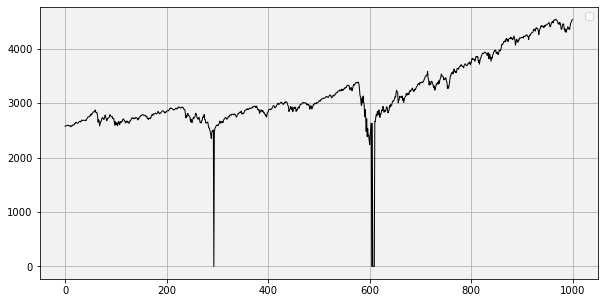

In [17]:
my_data = pd.read_csv(r'C:\users\johnf\downloads\DIX.csv')
# Transforming the File to an Array
my_data = np.array(my_data)
# Eliminating the time stamp
my_data = my_data[:, 1:4]

print(my_data)

def signal(Data, dix, gex, composite):
    
    Data = adder(Data, 3)
    
    for i in range(len(Data)):
        
        if Data[i, gex] <= 0:
            
            Data[i, gex] = -1
            
        else:
            
            Data[i, gex] = 0
               
    for i in range(len(Data)):        
        if Data[i, dix] >= 0.475:
            
            Data[i, dix] = -1          
          
        else:
            
            Data[i, dix] = 0
            
    for i in range(len(Data)):        
        if Data[i, dix] == -1 and Data[i, gex] == -1:
            
            Data[i, composite] = 1
            
    return Data


my_data=signal(my_data,1,2,0)

print(my_data)


signal_chart_ohlc_color(my_data,0, 5,3, window = 1000)

# Using 21 Periods as a Window of signal Quality Check
my_data = signal_quality(my_data, 0, 5,4, period, 6)


print(my_data)


signal_chart_ohlc_color(my_data,0, 5,3, window = 1000)

positives = my_data[my_data[:, 6] > 0]
negatives = my_data[my_data[:, 6] < 0]
# Calculating Signal Quality
Signal_quality = len(positives) / (len(negatives) + len(positives))
print('Signal Quality = ', round(Signal_quality * 100, 2), '%')
# Output: 84.21 %